# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [2]:
from Functions import bool_from_index, name_from_index, zscore
from Functions import get_ages_cols, get_category_cols, get_param_names

## Directories etc.

In [3]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
data_save_path = os.path.join(data_path, "all_data")

In [4]:
param_names = get_param_names()
ages_cols = get_ages_cols()
category_cols = get_category_cols()

In [5]:
wanted_cols = [
    
    # Participant info
    'ID', 'PreciseYrs', 'BMI', 'Gender', 'meanT', 'PDS', 'age_group',
    
    # Basic performance
    'bf_ACC', 'bf_RT', 'bf_RTsd', 'bf_ACC_delta', 'bf_RT_delta', 'bf_miss',
    'rl_ACC', 'rl_RT', 'rl_RTsd', 'rl_ACC_delta', 'rl_RT_delta', 'rl_miss',
    'ps_ACC', 'ps_RT', 'ps_RTsd', 'ps_ACC_delta', 'ps_RT_delta', 'ps_miss',

    # WSLS & stay
    'bf_WS', 'bf_LS', 'bf_stay_choice', 'bf_stay_motor',
    'rl_WS', 'rl_LS', 'rl_stay_choice', 'rl_stay_motor',
    'ps_WS', 'ps_LS', 'ps_stay', 

    # Parameters
    'bf_alpha', 'bf_nalpha', 'bf_1_over_beta', 'bf_forget',
    'rl_log_alpha', 'rl_log_nalpha', 'rl_forget', 'rl_rho', 'rl_epsilon_1_over_beta', 'rl_K',
    'ps_alpha', 'ps_nalpha', 'ps_1_over_beta_rl', 'ps_persev_rl', 'ps_1_over_beta_bf', 'ps_persev_bf', 'ps_p_switch', 'ps_p_reward',
    
    # Additional measures
    'rl_ACC_ns2_minus_ns5', 'rl_ACC_ns2_minus_ns5_delta', 'rl_RT_ns5_minus_ns2', 'rl_ns_slope', 'rl_lrn-ns_sig', 'rl_lrn-delay_sig', 'rl_lrn-pcor_sig', 'rl_lrn-pinc_sig',
    'ps_n_switches', 'ps_WLS', 'ps_LWS', 'ps_criterion_trial',
    'bf_ACC_first3trials', 'bf_asymptote', 'bf_learning_slope', 'bf_intercept', 'bf_prew', 'bf_delay',
]

# Format all_data

## Read in all_data and selected wanted columns

In [6]:
all_data = pd.read_csv(os.path.join(data_save_path, "all_data_raw.csv"), index_col=0)
all_data = all_data[wanted_cols]
all_data.to_csv(os.path.join(data_save_path, 'all_data.csv'))
all_data

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,0.56667,1.33950,0.69630,...,8,0.111111,1.000000,3.666667,0.333333,0.59077,-0.053115,0.255267,-0.318745,-0.108595
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.80000,1.19270,0.53170,...,8,0.870968,0.904762,4.222222,0.250000,0.96463,-2.393200,1.930379,1.195528,-0.120319
2,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.85000,0.99265,0.52117,...,8,1.000000,0.950000,4.000000,0.500000,0.98363,-2.137900,2.352541,1.329053,-0.168739
3,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,0.73333,1.51800,1.03220,...,7,0.708333,0.933333,4.250000,0.416667,0.82375,-1.937400,1.152193,0.528728,-0.163958
4,23,11.206023,15.147686,1.0,27.712900,1.00,0.50,0.81667,1.62240,0.85927,...,8,0.304348,1.000000,3.714286,0.666667,0.88317,-1.730200,1.548147,0.690841,-0.190590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,2.0,NaN,NaN,2.00,0.74167,1.11640,0.52359,...,8,0.777778,1.000000,3.625000,0.666667,0.75862,3.626000,1.238689,0.644662,-0.135437
243,466,20.083333,NaN,1.0,NaN,NaN,2.00,0.60833,0.87618,0.32142,...,8,0.785714,1.000000,3.750000,0.583333,0.63033,-1.718600,0.566666,0.213814,-0.238006
244,467,18.750000,NaN,2.0,NaN,NaN,2.00,0.80000,1.29200,0.83115,...,7,0.173913,1.000000,4.000000,0.750000,0.80872,-0.662550,1.276838,0.174681,-0.118256
245,468,21.833333,NaN,2.0,NaN,NaN,2.00,0.71667,2.12680,1.53770,...,7,0.590909,1.000000,5.000000,0.500000,0.73918,-0.539960,0.941660,0.174725,-0.110450


In [7]:
all_data_z = all_data[ages_cols + ['age_group']]
for col in [col for col in all_data.columns if not col in ages_cols + ['age_group']]:
    all_data_z[col] = zscore(all_data[col])
    
# Save
all_data_z.to_csv(os.path.join(data_save_path, 'all_data_z.csv'))
all_data_z

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,-1.449943,0.402803,0.137944,...,0.756023,-1.566994,0.528998,-0.589174,-1.409289,-1.606155,0.509726,-1.465358,-2.017761,0.723703
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.185568,-0.010351,-0.395413,...,0.756023,1.004158,-0.002945,0.453916,-1.918199,0.842331,-0.378357,0.258532,0.749533,0.573609
2,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.536040,-0.573372,-0.429533,...,0.756023,1.440768,0.249728,0.036680,-0.391469,0.966766,-0.281469,0.692987,0.993548,-0.046277
3,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,-0.281751,0.905174,1.226368,...,-0.389607,0.453846,0.156638,0.506071,-0.900379,-0.080321,-0.205377,-0.542314,-0.469027,0.014931
4,23,11.206023,15.147686,1.0,27.712900,1.00,0.50,0.302416,1.198997,0.666019,...,0.756023,-0.913132,0.528998,-0.499766,0.626351,0.308833,-0.126743,-0.134831,-0.172768,-0.326015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,2.0,NaN,NaN,2.00,-0.223292,-0.225090,-0.421692,...,0.756023,0.688828,0.528998,-0.667406,0.626351,-0.506871,1.905983,-0.453300,-0.257159,0.380071
243,466,20.083333,NaN,1.0,NaN,NaN,2.00,-1.157930,-0.901166,-1.076787,...,0.756023,0.715683,0.528998,-0.432711,0.117441,-1.347068,-0.122341,-1.144892,-1.044524,-0.933035
244,467,18.750000,NaN,2.0,NaN,NaN,2.00,0.185568,0.269119,0.574901,...,-0.389607,-1.354489,0.528998,0.036680,1.135261,-0.178756,0.278440,-0.414040,-1.116037,0.600023
245,468,21.833333,NaN,2.0,NaN,NaN,2.00,-0.398528,2.618582,2.864350,...,-0.389607,0.056514,0.528998,1.914243,-0.391469,-0.634187,0.324964,-0.758977,-1.115958,0.699948


In [58]:
def get_category_from_feature(data):
    
    # Get broad categories by finding patterns in the feature names
    category = data['feature'].apply(name_from_index, names=param_names + category_cols)
    
    # Adapt / add more specific categories manually
    for cat in ['bf_asymptote', 'bf_intercept', 'ps_n_switches', 'ps_n_switches', 'ps_criterion_trial']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'ACC2'
        
    for cat in ['rl_ns_slope', 'bf_learning_slope']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'slope'
        
    for cat in ['rl_lrn-ns_sig', 'rl_ACC_ns2_minus_ns5', 'rl_RT_ns5_minus_ns2', 'rl_K']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'WM'
        
    for cat in ['bf_prew', 'rl_lrn-pcor_sig', 'rl_lrn-pinc_sig']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'RL'
        
    for cat in ['bf_delay', 'rl_lrn-delay_sig']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'forget'
        
    for cat in ['ps_WLS', 'ps_LWS']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'XXS'
        
    for cat in ['ps_p_reward']:
        assert np.sum(data.feature == cat) > 0  # make sure each feature exists
        category[data.feature == cat] = 'alpha'
        
    return category

# # Example use
# get_category_from_feature(all_data_long)

In [59]:
# Melt all_data
all_data_long = all_data.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long['category'] = get_category_from_feature(all_data_long)
all_data_long['task'] = all_data_long.feature.apply(lambda x : x[:2])
all_data_long['param'] = all_data_long.feature.apply(lambda x : x[3:])

# Save
all_data_long.to_csv(os.path.join(data_save_path, 'all_data_long.csv'))
all_data_long

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,0.566670,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.800000,ACC,bf,ACC
2,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.850000,ACC,bf,ACC
3,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,0.733330,ACC,bf,ACC
4,23,11.206023,15.147686,1.0,27.712900,1.00,0.50,bf_ACC,0.816670,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
16050,465,22.333333,NaN,2.0,NaN,NaN,2.00,bf_delay,-0.135437,forget,bf,delay
16051,466,20.083333,NaN,1.0,NaN,NaN,2.00,bf_delay,-0.238006,forget,bf,delay
16052,467,18.750000,NaN,2.0,NaN,NaN,2.00,bf_delay,-0.118256,forget,bf,delay
16053,468,21.833333,NaN,2.0,NaN,NaN,2.00,bf_delay,-0.110450,forget,bf,delay


In [60]:
# Melt all_data_z
all_data_long_z = all_data_z.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long_z['category'] = get_category_from_feature(all_data_long_z)
all_data_long_z['task'] = all_data_long_z.feature.apply(lambda x : x[:2])
all_data_long_z['param'] = all_data_long_z.feature.apply(lambda x : x[3:])

# Save
all_data_long_z.to_csv(os.path.join(data_save_path, 'all_data_long_z.csv'))
all_data_long_z

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,-1.449943,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.185568,ACC,bf,ACC
2,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.536040,ACC,bf,ACC
3,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,-0.281751,ACC,bf,ACC
4,23,11.206023,15.147686,1.0,27.712900,1.00,0.50,bf_ACC,0.302416,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
16050,465,22.333333,NaN,2.0,NaN,NaN,2.00,bf_delay,0.380071,forget,bf,delay
16051,466,20.083333,NaN,1.0,NaN,NaN,2.00,bf_delay,-0.933035,forget,bf,delay
16052,467,18.750000,NaN,2.0,NaN,NaN,2.00,bf_delay,0.600023,forget,bf,delay
16053,468,21.833333,NaN,2.0,NaN,NaN,2.00,bf_delay,0.699948,forget,bf,delay


# Check that everything looks good

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


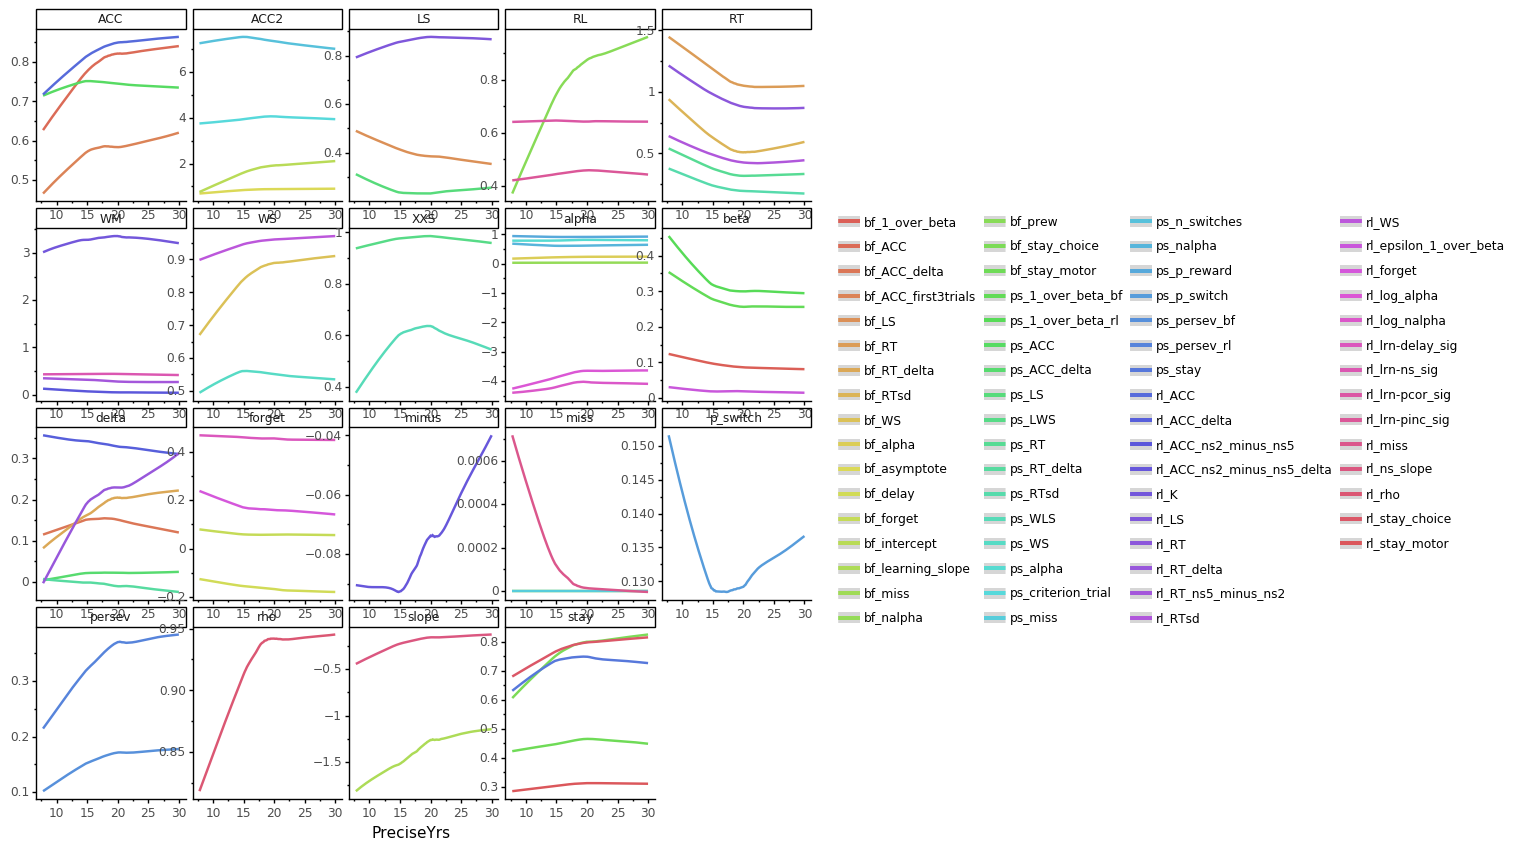

<ggplot: (161000352502)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


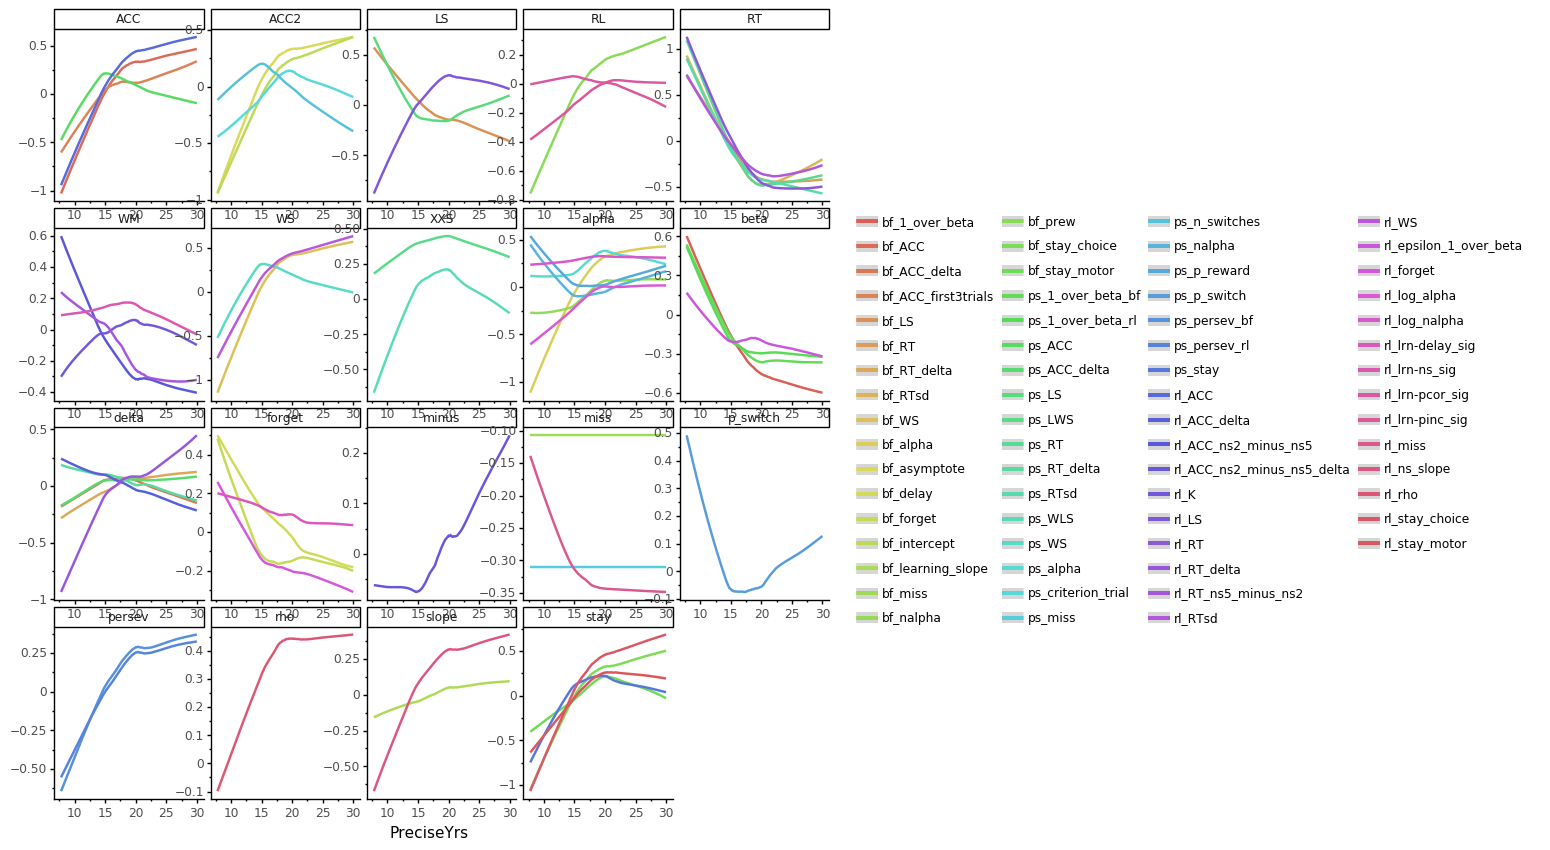

<ggplot: (161000352502)>


In [61]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'lrn'],
    gg.aes('PreciseYrs', 'value', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
#  + gg.theme(legend_position='none')
 + gg.labs(y='', color='')
 + gg.geom_smooth()
 + gg.facet_wrap('~ category', scales='free')
)
print(g)

g_z = g
g_z.data = all_data_long_z

print(g_z)